# Andes ieee14 base

**Scope**: import ieee14_base and flat run

Tip regarding andes:
1. *setup()* is to configure the case, once setup, cannot add new device
   or setup=False and run *ss.setup()* after setting

2. $S_{base}=100MVA$ in the case file

3. 'Toggler' is a group to add connect and disconnect device at specific time.

4. defalt load type is constant Z, cosntatn PQ load can reduce the stability margine and cause numerical error.

In [33]:
import andes
import os
import pandas as pd
import pandapower as pp

# andes and pandapower version
print(f'Andes version: {andes.__version__}')
print(f'Pandapower version: {pp.__version__}')

Andes version: 1.6.5.post4.dev0+gae11a531
Pandapower version: 2.8.0


In [34]:
# get andes case from excel
dir_path = os.path.abspath('..')
case_path = '/Test_ieee14_base/ieee14_base.xlsx'
case = dir_path + case_path
ssa = andes.load(case,
                 setup=True,
                 no_output=True,
                 default_config=False)

In [35]:
# Turn on numba to accelerate TDS
ssa.config.numba
ssa.PFlow.run()

True

In [36]:
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

True

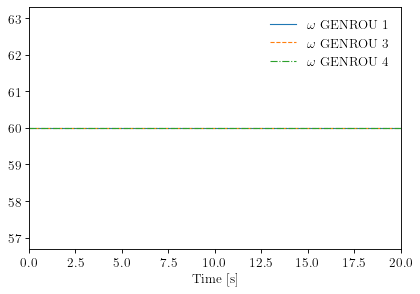

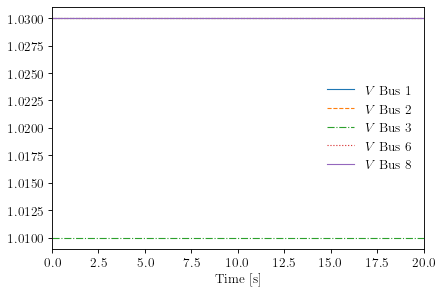

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [37]:
ssa.TDS.load_plotter()

ssa.TDS.plt.plot(ssa.GENROU.omega,
                a=(0, 2, 3),
                ytimes=60,
               )

ssa.TDS.plt.plot(ssa.GENROU.v)

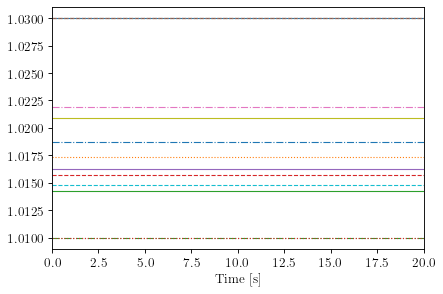

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [38]:
ssa.TDS.plt.plot(ssa.Bus.v)

## Eigenvalue analysis

Singular matrix. Case is not solvable
/Users/buxinshe/Documents/git-repo/andes/andes/routines/eig.py:224: LinAlgWarning: Ill-conditioned matrix (rcond=2.87882e-18): result may not be accurate.
  WT = solve(N, Weye, overwrite_b=True)


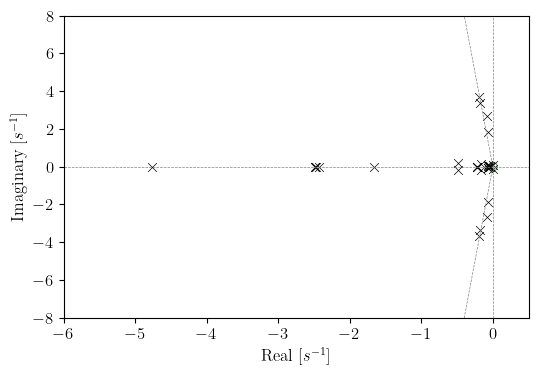

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:xlabel='Real [$s^{-1}$]', ylabel='Imaginary [$s^{-1}$]'>)

In [39]:
ssa.EIG.run()
ssa.EIG.plot()